Number of sample in DATA = 3138156
sample rate : 44100


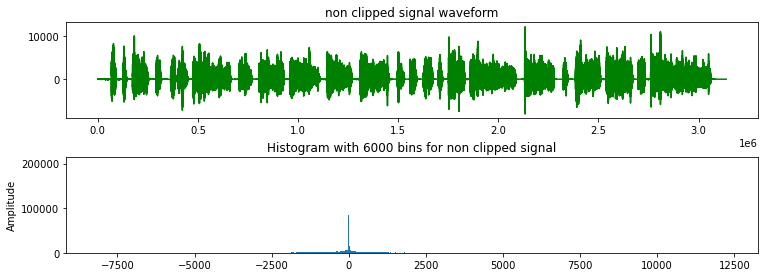

In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os

sample_rate, data = wavfile.read('/home/auishik/Documents/audio_checking_experiment/should be dual speaker/5069.wav') # reading wave file.
#print ('All_data =',data)
print('Number of sample in DATA =',len(data))
print('sample rate :', sample_rate)
#print(f"number of channels = {data.shape[1]}")
plt.figure(figsize=(12,4))
plt.subplot(2, 1, 1)
plt.plot(data, color = 'green')
plt.title('non clipped signal waveform')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.subplot(2, 1, 2)
plt.hist(data , bins=6000, color = None)  # arguments are passed to np.histogram.
plt.title("Histogram with 6000 bins for non clipped signal")
plt.ylabel('Amplitude')

plt.show()

No. of points in each bin :  [1 0 0 ... 1 0 1]
Size of the bins          :  [-8136.     -8132.6045 -8129.209  ... 12230.209  12233.6045 12237.    ]


/tmp/ipykernel_13670/2972831692.py:3: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist, bin_edges = scipy.histogram(data, bins = 6000)


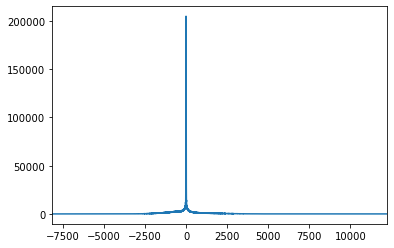

In [2]:
import scipy

hist, bin_edges = scipy.histogram(data, bins = 6000)
  
# Checking the results
print ("No. of points in each bin : ", hist)
print ("Size of the bins          : ", bin_edges)

plt.plot(bin_edges[:-1], hist)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

In [3]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

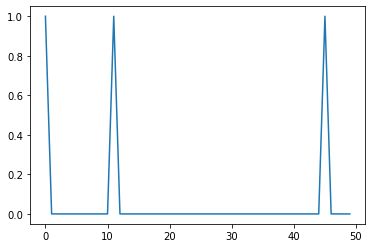

In [10]:
plt.plot(hist[:50])

In [11]:
fit1 = SimpleExpSmoothing(data).fit(smoothing_level = 0.2, optimized = False)

fit2 = SimpleExpSmoothing(data).fit(smoothing_level = 0.8, optimized = False)

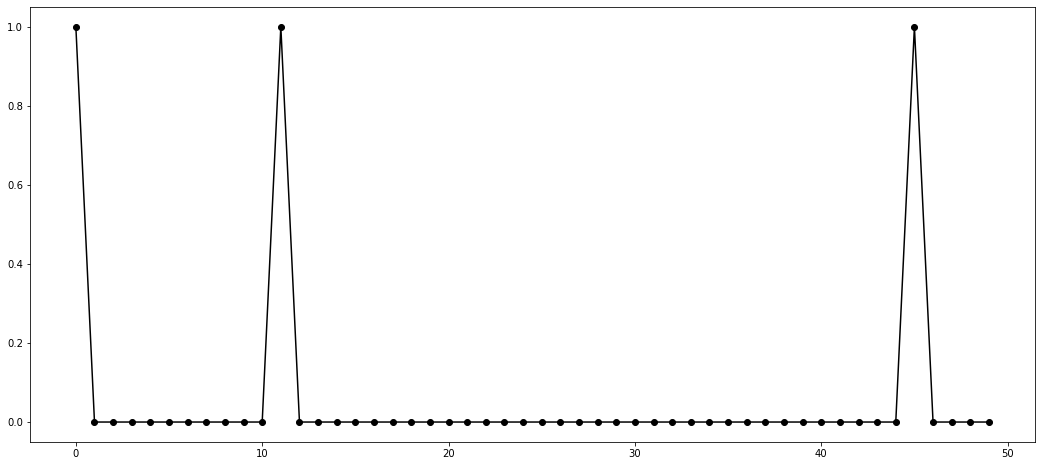

In [14]:
plt.figure(figsize=(18,8))
plt.plot(hist[:50], marker = 'o', color = 'black')

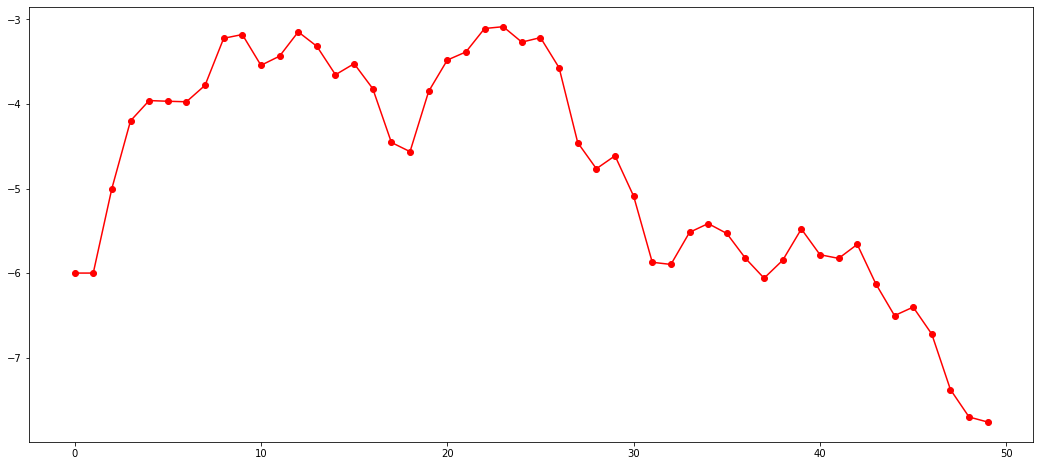

In [16]:
plt.figure(figsize=(18,8))
plt.plot(fit1.fittedvalues[:50], marker = 'o', color = 'red')

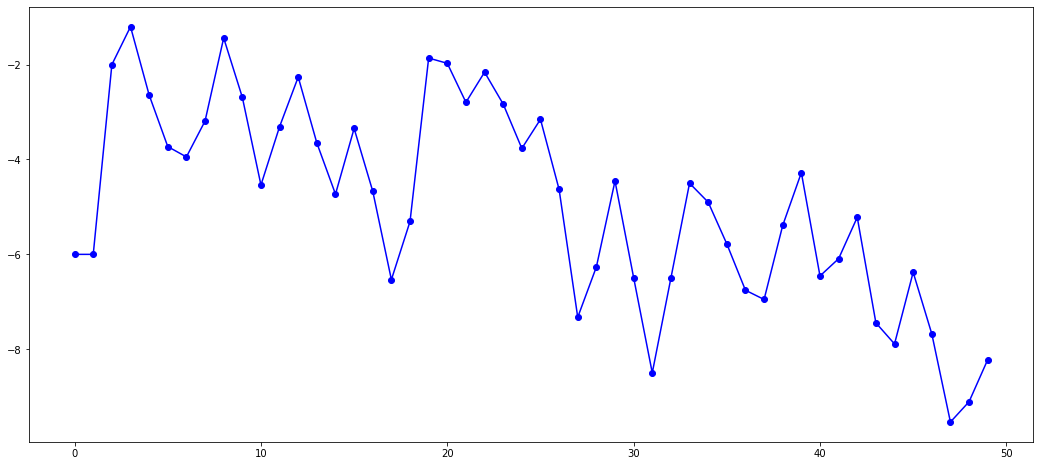

In [17]:
plt.figure(figsize=(18,8))
plt.plot(fit2.fittedvalues[:50], marker = 'o', color = 'blue')

In [7]:
nmax = np.amax(np_array)
nmin = np.amin(np_array)
nmax,nmin

NameError: name 'np_array' is not defined

In [ ]:
clipped_segments = []
inside_clip = False
clip_start = 0
clip_end = 0

In [ ]:
for i, sample in enumerate(np_array):
    
    if (sample <= nmin + 1) or (sample >= nmax - 1):
        if not inside_clip:
            inside_clip = True
            clip_start = i
        
    elif inside_clip:
        inside_clip = False
        clip_end = i-1
        clipped_segment = (clip_start, clip_end)
        print(clip_start,clip_end, -clip_start+clip_end)
        if (clip_end - clip_start)>=3:
            clipped_segments.append(clipped_segment)

In [ ]:
clipped_segments

In [ ]:
if not clipped_segments:
    print('It is not a clipped audio')
else:
    print('Sorry, It is a Clipped audio')

In [ ]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12, 4]
plt.rcParams["figure.autolayout"] = True
input_data = read('/media/auishik/New Volume/Official/wav/clipped.wav')
audio = input_data[1]
plt.plot(audio[0:1024])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()